In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [2]:
final_data = pd.read_csv('Task 3_Final Content Data set.csv')
final_data

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30
...,...,...,...,...,...,...,...,...
24568,24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,27/6/20 9:46,audio,technology,negative,10
24569,24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,16/2/21 17:17,audio,technology,positive,45
24570,24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,12/9/20 3:54,audio,technology,positive,30
24571,24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,4/11/20 20:08,audio,technology,negative,12


# Count the number of unique categories

In [3]:
final_data['Category'].nunique()


16

# Visialising all categories

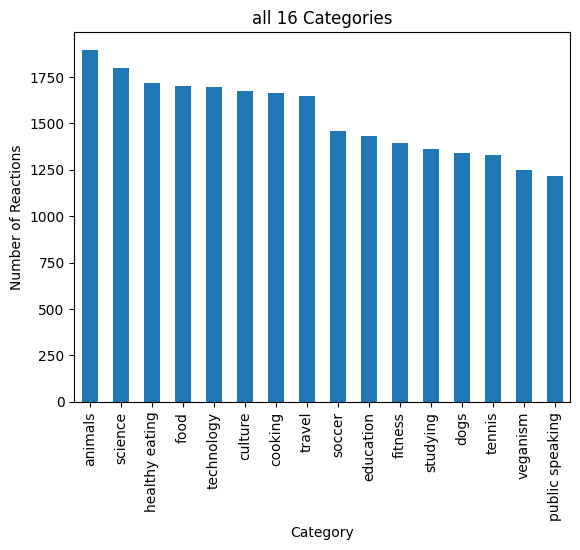

In [4]:
final_data['Category'].value_counts().plot(kind='bar')
plt.title('all 16 Categories')
plt.xlabel('Category')
plt.ylabel('Number of Reactions')
plt.show()

# Identify Top 5 Categories:
 count the frequency of each category and print the top 5


In [5]:
topfive = final_data['Category'].value_counts().head(5)
topfive

,count
Category,
animals,1897
science,1796
healthy eating,1717
food,1699
technology,1698


### Visualize Top 5 Categories:

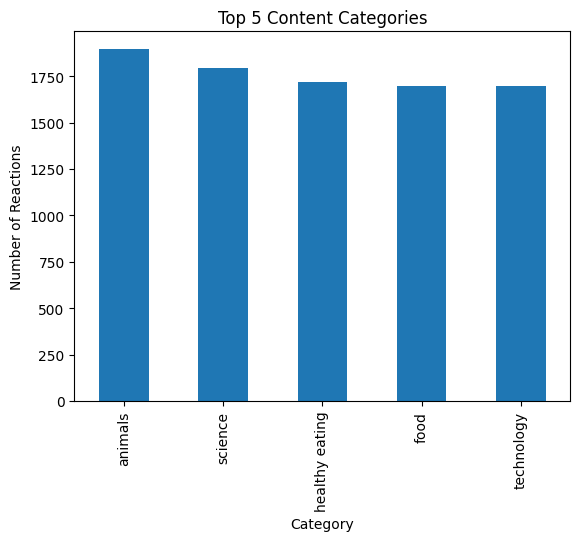

In [6]:
topfive.plot(kind='bar')
plt.title('Top 5 Content Categories')
plt.xlabel('Category')
plt.ylabel('Number of Reactions')
plt.show()

#Top five categories based on sum of scores

In [7]:
# Group the dataframe by 'Category' and calculate the sum of 'Score' for each category
category_scores = final_data.groupby('Category')['Score'].sum()

# Sort the categories by their total scores in descending order and select the top 5
top_5_categories = category_scores.sort_values(ascending=False).head(5)

print(top_5_categories)


Category
animals           74965
science           71168
healthy eating    69339
technology        68738
food              66676
Name: Score, dtype: int64


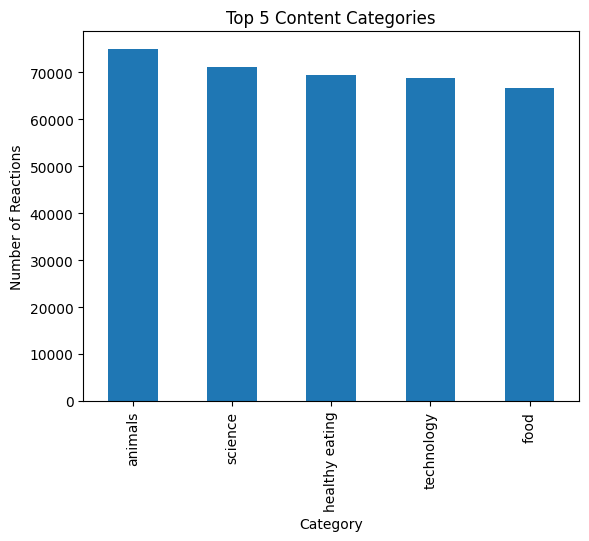

In [8]:
top_5_categories.plot(kind='bar')
plt.title('Top 5 Content Categories')
plt.xlabel('Category')
plt.ylabel('Number of Reactions')
plt.show()

# Plotting Category scores...

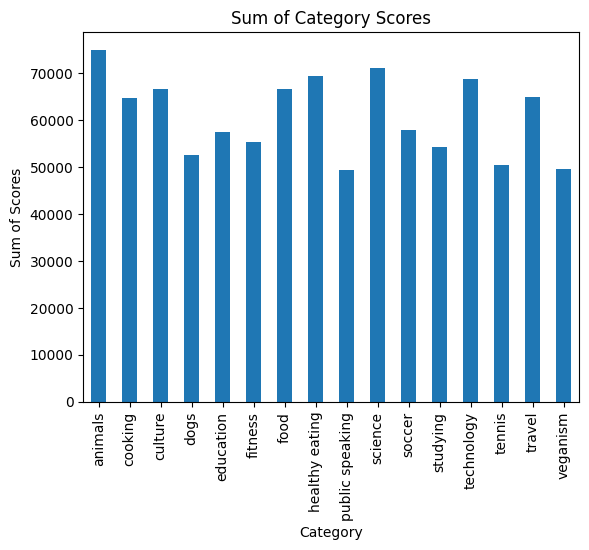

In [9]:
category_scores.plot(kind='bar')
plt.title('Sum of Category Scores')
plt.xlabel('Category')
plt.ylabel('Sum of Scores')
plt.show()

# number of reactions to the most popular category

In [10]:
# Find the most popular category
most_popular_category = final_data['Category'].value_counts().index[0]

# Filter the dataframe to only include reactions to the most popular category
filtered_data = final_data[final_data['Category'] == most_popular_category]

# Count the number of reactions
num_reactions = filtered_data.shape[0]

print(num_reactions)


1897


# the month with the most posts

In [11]:
# Extract the month from the 'Datetime' column and count occurrences
final_data['Month'] = final_data['Datetime'].str.split('/').str[1]
month_counts = final_data['Month'].value_counts()

# Display the month with the most posts
print(month_counts.index[0])


5


# visualizing posts per month

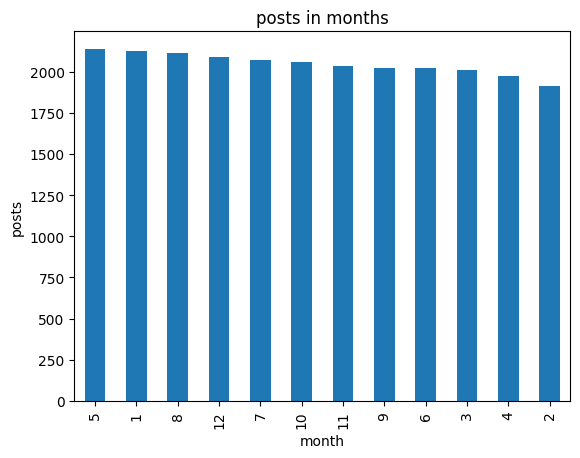

In [12]:
month_counts.plot(kind='bar')
plt.title('posts in months')
plt.xlabel('month')
plt.ylabel('posts')
plt.show()

# Group the data by month and count the number of posts in each month

In [16]:
posts_per_month = final_data.groupby('Month')['Content ID'].count()

print(posts_per_month.sort_values(ascending=False))


Month
5     2138
1     2126
8     2114
12    2092
7     2070
10    2056
11    2034
9     2022
6     2021
3     2012
4     1974
2     1914
Name: Content ID, dtype: int64
